In [2]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import missingno as msno
from zipfile import ZipFile as zf
import random
#import sklearn.metrics       as Metrics

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
df = pd.read_csv("/mnt/workstation/data/input_Pesos_Dic_20.csv")#, sep= ",", names =header)


In [3]:
df.head()

,periodo,id_cli,fecha_nacimiento,edad,genero,estado_civil,nivel_academico,profesion,ocupacion,tipo_vivienda,...,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar
0,201908.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,1.0,0.0,319127.933029,C,0.0,NaN,1.284876e+06,NaN,238055.347763
1,201909.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,1.0,0.0,318417.111563,C,0.0,NaN,1.282014e+06,NaN,271616.618245
2,201907.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,1.0,0.0,318987.340975,C,0.0,NaN,1.285999e+06,NaN,249049.203031
3,201903.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,1.0,0.0,323130.849045,C,0.0,NaN,1.217153e+06,NaN,286498.294824
4,201911.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,0.0,0.0,690210.427661,C,0.0,NaN,1.278547e+06,NaN,426714.175005


## MAX

In [4]:
var_max = ['cant_mora_30_tdc_ult_3m_sf', 'cant_mora_30_consum_ult_3m_sf']

In [5]:
maxi = df[['id_cli','cant_mora_30_tdc_ult_3m_sf', 'cant_mora_30_consum_ult_3m_sf']].groupby(by = ['id_cli']).max()

In [6]:
maxi

,cant_mora_30_tdc_ult_3m_sf,cant_mora_30_consum_ult_3m_sf
id_cli,,
3.0,0.0,0.0
8.0,0.0,0.0
12.0,0.0,0.0
15.0,1.0,0.0
17.0,0.0,0.0
...,...,...
8704791.0,0.0,5.0
8704792.0,0.0,0.0
8704795.0,0.0,0.0


<AxesSubplot:xlabel='cant_mora_30_tdc_ult_3m_sf'>

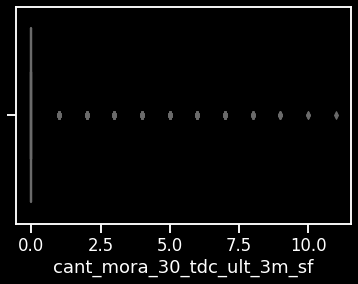

In [7]:
sns.set(style = "ticks", context = "talk")
plt.style.use("dark_background")
sns.boxplot(x = maxi['cant_mora_30_tdc_ult_3m_sf'])

<AxesSubplot:xlabel='cant_mora_30_consum_ult_3m_sf'>

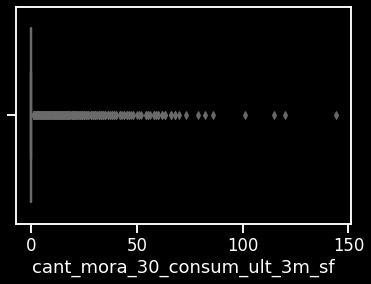

In [8]:
sns.boxplot(x = maxi['cant_mora_30_consum_ult_3m_sf'])

## ultimo valor

In [7]:
ult_val = ['ctas_activas','ctas_embargadas','cupo_tc_mdo','saldo_prom3_tdc_mdo']

In [8]:
ult_val = df[['periodo','id_cli','ctas_activas','ctas_embargadas','cupo_tc_mdo','saldo_prom3_tdc_mdo']].sort_values(by = 
    'periodo')

In [9]:
ult_val

,periodo,id_cli,ctas_activas,ctas_embargadas,cupo_tc_mdo,saldo_prom3_tdc_mdo
14720737,201902.0,4635506.0,1.0,0.0,6.046491e+06,1.296347e+06
12008391,201902.0,8592531.0,1.0,0.0,0.000000e+00,0.000000e+00
17527397,201902.0,2880639.0,2.0,0.0,0.000000e+00,0.000000e+00
18740290,201902.0,3005678.0,1.0,0.0,0.000000e+00,0.000000e+00
13333004,201902.0,8271976.0,1.0,0.0,1.062306e+07,1.120165e+07
...,...,...,...,...,...,...
3129882,202011.0,4928880.0,1.0,0.0,0.000000e+00,0.000000e+00
14039796,202011.0,1219097.0,1.0,0.0,1.960635e+07,6.923756e+06
3129894,202011.0,6955643.0,1.0,0.0,0.000000e+00,0.000000e+00
3129836,202011.0,1057671.0,0.0,0.0,2.559707e+06,3.136394e+06


In [10]:
ult_val.drop_duplicates(subset=['id_cli'], inplace = True, keep='last')

In [11]:
ult_val.head(20)

,periodo,id_cli,ctas_activas,ctas_embargadas,cupo_tc_mdo,saldo_prom3_tdc_mdo
13332501,201902.0,3668670.0,1.0,0.0,0.000000e+00,0.000000e+00
9246375,201902.0,5844992.0,1.0,0.0,0.000000e+00,0.000000e+00
15014833,201902.0,3259356.0,1.0,0.0,1.394759e+07,9.927192e+06
15704186,201902.0,1177013.0,1.0,0.0,1.628383e+06,0.000000e+00
3171137,201902.0,4991557.0,1.0,0.0,0.000000e+00,0.000000e+00
17510568,201902.0,2032792.0,1.0,0.0,8.444238e+06,0.000000e+00
18750089,201902.0,1305287.0,1.0,0.0,3.127496e+06,0.000000e+00
3210189,201902.0,22090.0,2.0,0.0,1.171873e+07,4.785589e+06
9225203,201902.0,72444.0,3.0,0.0,1.259025e+07,3.231745e+06
3117623,201902.0,3765079.0,1.0,0.0,0.000000e+00,0.000000e+00


<AxesSubplot:xlabel='cant_mora_30_tdc_ult_3m_sf'>

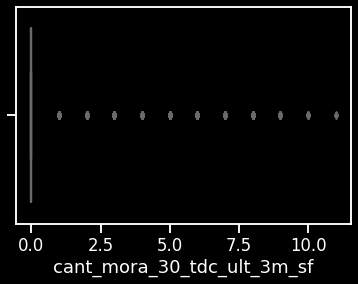

In [14]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
sns.boxplot(x=df['cant_mora_30_tdc_ult_3m_sf'])

<AxesSubplot:xlabel='ctas_activas'>

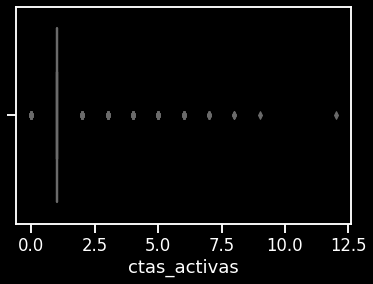

In [15]:
sns.boxplot(x = ult_val['ctas_activas'])

<AxesSubplot:xlabel='ctas_embargadas'>

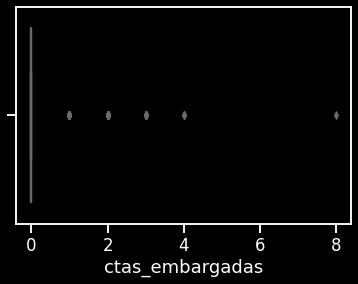

In [16]:
sns.boxplot(x = ult_val['ctas_embargadas'])

<AxesSubplot:xlabel='cupo_tc_mdo'>

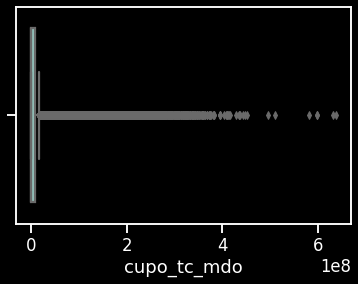

In [17]:
sns.boxplot(x = ult_val['cupo_tc_mdo'])

<AxesSubplot:xlabel='saldo_prom3_tdc_mdo'>

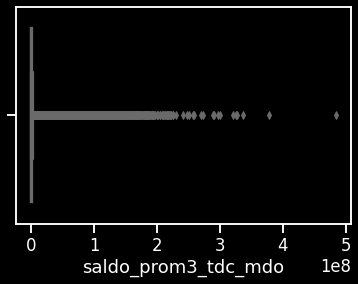

In [18]:
sns.boxplot(x = ult_val['saldo_prom3_tdc_mdo'])

## promedio

In [12]:
prom = ['ingreso_nompen','ingreso_final','cuota_de_vivienda','cuota_de_consumo','cuota_rotativos',
        'cuota_de_sector_solidario','cuota_sector_real_comercio']
df['cuota_de_consumo'] = df['cuota_de_consumo'].abs() 
prom = df[['id_cli','ingreso_nompen','ingreso_final','cuota_de_vivienda','cuota_de_consumo','cuota_rotativos',
        'cuota_de_sector_solidario','cuota_sector_real_comercio']].groupby(by = ['id_cli']).mean()

<AxesSubplot:xlabel='ingreso_nompen'>

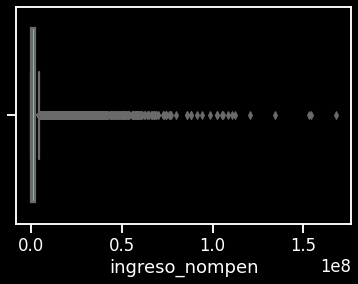

In [21]:
sns.boxplot(x = prom['ingreso_nompen'])

<AxesSubplot:xlabel='ingreso_final'>

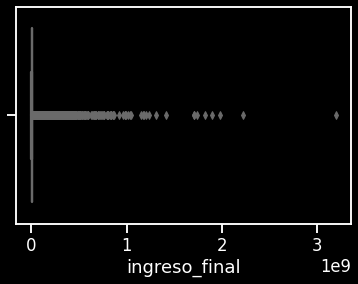

In [22]:
sns.boxplot(x = prom['ingreso_final'])

<AxesSubplot:xlabel='cuota_de_vivienda'>

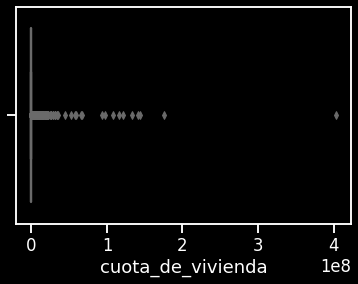

In [23]:
sns.boxplot(x = prom['cuota_de_vivienda'])

<AxesSubplot:xlabel='cuota_de_consumo'>

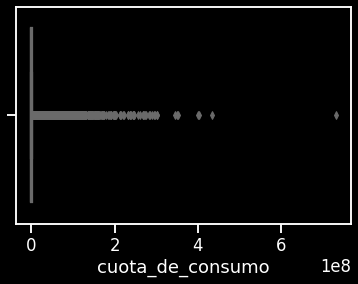

In [24]:
sns.boxplot(x = prom['cuota_de_consumo'])

<AxesSubplot:xlabel='cuota_rotativos'>

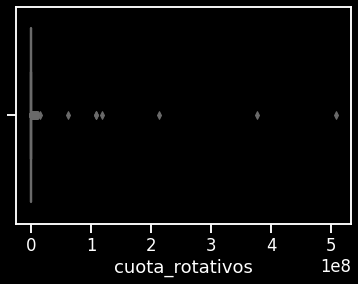

In [25]:
sns.boxplot(x = prom['cuota_rotativos'])

<AxesSubplot:xlabel='cuota_de_sector_solidario'>

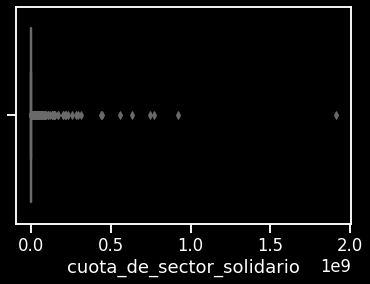

In [26]:
sns.boxplot(x = prom['cuota_de_sector_solidario'])

<AxesSubplot:xlabel='cuota_sector_real_comercio'>

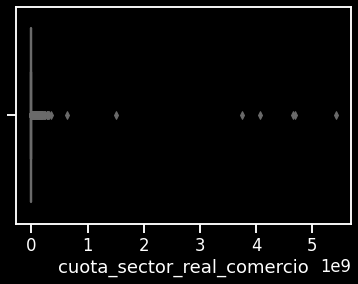

In [27]:
sns.boxplot(x = prom['cuota_sector_real_comercio'])

## Calcular desviaciones

In [13]:
des = ['id_cli','mediana_nom3','mediana_pen3','ingreso_nompen','ingreso_final']
desv = df[['id_cli','mediana_nom3','mediana_pen3','ingreso_nompen','ingreso_final']].groupby(by = ['id_cli']).std()
desv.columns=['mediana_nom3_desv','mediana_pen3_desv','ingreso_nompen_desv','ingreso_final_desv']

<AxesSubplot:xlabel='mediana_nom3_desv'>

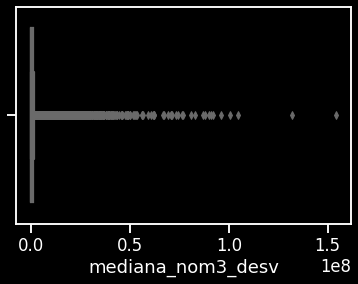

In [41]:
sns.boxplot(x = desv['mediana_nom3_desv'])

<AxesSubplot:xlabel='mediana_pen3'>

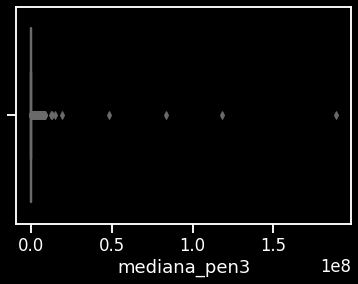

In [31]:
sns.boxplot(x = desv['mediana_pen3_desv'])

<AxesSubplot:xlabel='ingreso_nompen'>

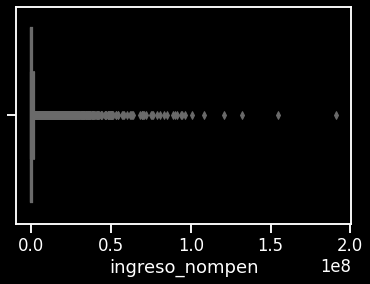

In [32]:
sns.boxplot(x = desv['ingreso_nompen_desv'])

<AxesSubplot:xlabel='ingreso_final'>

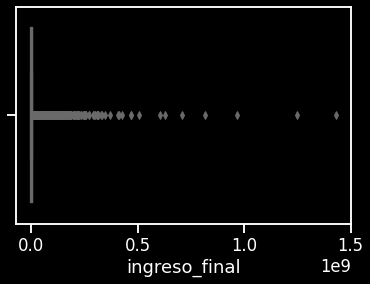

In [33]:
sns.boxplot(x = desv['ingreso_final_desv'])

In [34]:
df.columns

Index(['periodo', 'id_cli', 'fecha_nacimiento', 'edad', 'genero',
       'estado_civil', 'nivel_academico', 'profesion', 'ocupacion',
       'tipo_vivienda', 'ult_actual', 'categoria', 'codigo_ciiu',
       'ind_mora_vigente', 'cartera_castigada', 'ciudad_residencia',
       'departamento_residencia', 'ciudad_laboral', 'departamento_laboral',
       'rechazo_credito', 'mora_max', 'cant_moras_30_ult_12_meses',
       'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses',
       'cupo_total_tc', 'tenencia_tc', 'cuota_tc_bancolombia', 'tiene_consumo',
       'tiene_crediagil', 'nro_tot_cuentas', 'ctas_activas',
       'tiene_ctas_activas', 'ctas_embargadas', 'tiene_ctas_embargadas',
       'pension_fopep', 'cuota_cred_hipot', 'tiene_cred_hipo_1',
       'tiene_cred_hipo_2', 'mediana_nom3', 'mediana_pen3', 'ingreso_nompen',
       'cat_ingreso', 'ingreso_final', 'cant_mora_30_tdc_ult_3m_sf',
       'cant_mora_30_consum_ult_3m_sf', 'cuota_de_vivienda',
       'cuota_de_consumo', 'cuota

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19255248 entries, 0 to 19255247
Data columns (total 65 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   periodo                        float64
 1   id_cli                         float64
 2   fecha_nacimiento               float64
 3   edad                           float64
 4   genero                         object 
 5   estado_civil                   object 
 6   nivel_academico                object 
 7   profesion                      object 
 8   ocupacion                      object 
 9   tipo_vivienda                  object 
 10  ult_actual                     float64
 11  categoria                      int64  
 12  codigo_ciiu                    float64
 13  ind_mora_vigente               bool   
 14  cartera_castigada              bool   
 15  ciudad_residencia              object 
 16  departamento_residencia        object 
 17  ciudad_laboral                 object 
 18  

In [14]:
#salidas: maxi ult_val desv
output = maxi.merge(ult_val,on = ['id_cli']).merge(desv, on = ['id_cli']).merge(prom, on=['id_cli'])

In [15]:
output.to_csv('Aggregate_20_30.csv')